In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
from astropy.table import Table
from scipy.spatial import distance
from scipy import spatial
from scipy.spatial import KDTree
import time
import matplotlib.path as mpltPath

In [38]:
t = Table.read('CHAM_2MASS_data.vot',format='votable')
#t = Table.read('NGC2264.vot',format='votable')
print(t.colnames) #To be able to know column names within VOTable
Source = t["Source"]
Gmag = t["__Gmag_"]
Jmag = t["Jmag"]
Hmag = t["Hmag"]
Kmag = t["Kmag"]
Qfl = t["Qfl"]
Dup = t["Dup"]
RA = t['RAJ2000']
DEC = t['DEJ2000']

['d_arcsec', '_2MASS', 'RAJ2000', 'DEJ2000', 'errHalfMaj', 'errHalfMin', 'errPosAng', 'Jmag', 'Hmag', 'Kmag', 'e_Jmag', 'e_Hmag', 'e_Kmag', 'Qfl', 'Rfl', 'X', 'MeasureJD', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Source', 'Plx', 'pmRA', 'pmDE', 'RADEcor', 'Dup', '__FG_', 'e__FG_', '__Gmag_', 'Var']


23361


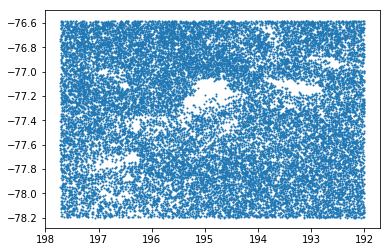

23361 23361 23361 23361 23361 23361


In [3]:
print(len(RA))
plt.scatter(RA,DEC,s=1.0)
plt.gca().invert_xaxis()
plt.show()
print(len(RA),len(DEC),len(Jmag),len(Hmag),len(Kmag),len(Gmag))

In [39]:

for i in range(0,len(Dup)):
    if(Dup.mask[i] == False):
        if(Dup[i] > 0.5):
            row = t[i]
            cols = row._table.columns.values()
            for col in cols:
                col.mask[i] = True
print("Finished masking sources with GAIA Dup flag of 1 or greater")
test = Dup.compressed()
print("   Remaining number of sources: ",len(test))
#print(len(test))
print(len(Jmag.compressed()))
#print(len(Dup))
#print(len(DistW))

#print(t['Dup'])

for i in range(0,len(Qfl)):
    if(Source.mask[i] ==False):
        if(Qfl[i][0] == ord("A")):
            Jmag.mask[i] = False
        else:
            Jmag.mask[i] = True
        if(Qfl[i][1] == ord("A")):
            Hmag.mask[i] = False
        else:
            Hmag.mask[i] = True
        if(Qfl[i][2] == ord("A")):
            Kmag.mask[i] = False
        else:
            Kmag.mask[i] = True

print("Sources: ", len(Jmag.compressed()))

Finished masking sources with GAIA Dup flag of 1 or greater
   Remaining number of sources:  21024
21024
Sources:  13123


In [40]:
Test = Source.compressed()
unique = set()
Gdups = set()

for i in range(0,len(Test)):
    if(Test[i] in unique):
        print("GAIA Duplicate Source: ",Test[i])
        Gdups.add(Test[i])
    else:
        unique.add(Test[i])
print("Finished GAIA Duplicate Check. Found: ", len(Gdups))

for i in range(0,len(Source)):
    if(Source.mask[i] == False):
        Name = Source[i]
        if(Name in Gdups):
            row = t[i]
            idx = row._index
            cols = row._table.columns.values()
            for col in cols:
                col.mask[i] = True
print("Finished masking all GAIA duplicates. All sources involved")
TwoM = t["_2MASS"]
unique = set()
Tdups = set()
Test = TwoM.compressed()
for i in range(0,len(Test)):
    if(Test[i] in unique):
        print("2MASS Duplicate Source: ",Test[i])
        Tdups.add(Test[i])
    else:
        unique.add(Test[i])
print("Finished 2MASS Duplicate Check. Found: ", len(Tdups))

for i in range(0,len(TwoM)):
    if(Source.mask[i] == False):
        Name = TwoM[i]
        if(Name in Tdups):
            row = t[i]
            idx = row._index
            cols = row._table.columns.values()
            for col in cols:
                col.mask[i] = True
print("Finished masking all 2MASS duplicates. All sources involved")
Test = Source.compressed()
print("Remaining valid sources: ",len(Test))

GAIA Duplicate Source:  5788056635724425600
GAIA Duplicate Source:  5788094534514171264
GAIA Duplicate Source:  5788940402554435456
GAIA Duplicate Source:  5788940402554435328
GAIA Duplicate Source:  5788946449866438144
GAIA Duplicate Source:  5788950023279410688
GAIA Duplicate Source:  5789195420532856960
GAIA Duplicate Source:  5789050766033084672
Finished GAIA Duplicate Check. Found:  8
Finished masking all GAIA duplicates. All sources involved
2MASS Duplicate Source:  b'12535988-7810582'
2MASS Duplicate Source:  b'12572867-7810469'
2MASS Duplicate Source:  b'12525513-7810410'
2MASS Duplicate Source:  b'12521635-7810383'
2MASS Duplicate Source:  b'13072837-7809195'
2MASS Duplicate Source:  b'13020577-7809040'
2MASS Duplicate Source:  b'12592458-7809004'
2MASS Duplicate Source:  b'12540955-7808018'
2MASS Duplicate Source:  b'13062158-7807123'
2MASS Duplicate Source:  b'12512998-7807093'
2MASS Duplicate Source:  b'13014955-7806499'
2MASS Duplicate Source:  b'13030722-7806058'
2MASS Du

23361
23361
Total Stars:  20671


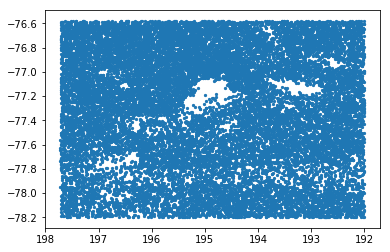

In [44]:
print(len(Jmag))
print(len(RA))
data2 = []
RA2 = []
DEC2 = []
for i in range(len(RA)):
    if(Jmag.mask[i] == False and Hmag.mask[i] == False and Kmag.mask[i] == False):
        RA2.append(RA[i])
        DEC2.append(DEC[i])
        
print('Total Stars: ',len(RA.compressed()))
plt.scatter(RA,DEC,s=5.0)
plt.gca().invert_xaxis()
plt.show()

26564


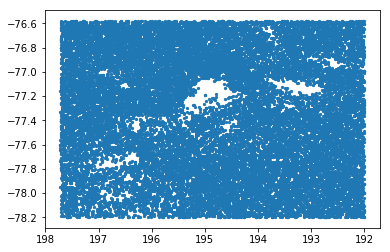

In [52]:
plt.scatter(RA,DEC,s=5.0)
print(len(RA.compressed()))
plt.gca().invert_xaxis()
plt.show()
for j in range(len(Dup)):
    if(Dup[j] >0.5):
        print('yes')

In [6]:
def distance_map(data,pixel_count,RAmin, RAmax, DEmin, DEmax, neighbor,scatter, contour):
    #Function uses KD Tree to create a distance map and returns pixel counts along both axes, as well as the
    #scale of degrees to pixel for each axis
    
    #Variables Read In
    #data: an array with two columns of stellar coordinates (RA,DEC)
    #pixel_count: number of pixels for large side of image
    #RAmin, RAmax, DEmin, DEmax: min/max coordinates of image
    #neighbor: number of nearest neighbor to calculate
    #scatter: True/False create a scatter plot of the stars
    #contour: True/False create a contour plot of the distance map
    
    #Varables Returned
    #dist2: distance map
    #pixel_count: pixel count along x axis
    #pixel_count2: pixel count along y axis
    #dRA: degrees to pixel scale along x axis (for RA)
    #dDE: degrees to pixel scale along y axis (for Dec)

    from scipy.spatial import KDTree

    #use KD tree to find distances to nearest neighbor stars
    tree = KDTree(data)
    
    #find distances between min/max RA and DE
    diffRA = (RAmax - RAmin)
    diffDE = (DEmax - DEmin)
    
    #make pixel count along x and y axes equal initially
    pixel_count2 = pixel_count
    
    #makes sure that both x and y axes have same scale of degrees to pixel
    if (diffRA < diffDE):
        dDE = diffDE/pixel_count2
        pixel_count = int(diffRA/dDE)
        dRA = diffRA/pixel_count
    if (diffRA > diffDE):
        dRA = diffRA/pixel_count
        pixel_count2 = int(diffDE/dRA)
        dDE = diffDE/pixel_count2
    if (diffRA == diffDE):
        dRA = diffRA/pixel_count
        dDE = diffDE/pixel_count
        
    #create array of coordinates for image background
    for i in range(0,pixel_count):
        for j in range(0,pixel_count2):
            if (i==0 and j == 0):
                array4 = np.array([RAmin,DEmin])
            else:
                array3 = [RAmin+i*dRA,DEmin+j*dDE]
                array4 = np.vstack((array4,array3))

    #find nearest neighbor distances to background points
    image = tree.query(array4,k=neighbor+1)

    #change array of background points so it is pixel_count x pixel_count2
    dist2 = image[0][:,neighbor-1]
    dist2 = np.resize(dist2,(pixel_count,pixel_count2))
    dist2 = np.rot90(dist2, k=1, axes=(1,0))
    dist2 = np.fliplr(dist2)

    #display map   
    plt.imshow(dist2, origin='lower',extent=[RAmin,RAmax,DEmin,DEmax])
    plt.gca().invert_xaxis()
    plt.show()
    
    #contour plot
    if (contour == True):
        ct = plt.contourf(dist2, cmap='tab10',extent=[RAmin,RAmax,DEmin,DEmax])
        plt.gca().invert_xaxis()
        plt.colorbar()
        plt.show()
    #scatter plot
    if (scatter == True):
        plt.scatter(data[:,0],data[:,1],s = 1,c = 'k')
        plt.gca().invert_xaxis()
        plt.show()
        
    return dist2, pixel_count, pixel_count2, dRA, dDE

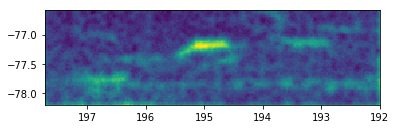

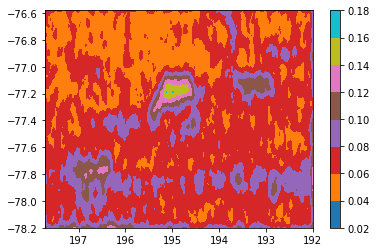

Elapsed time is: 14.014256000518799


In [12]:
import time

num = len(RA2)
X1 = np.zeros(num)
Y1 = np.zeros(num)
for i in range(0,num):
    X1[i] = RA2[i]
    Y1[i] = DEC2[i]
X = np.column_stack((X1,Y1))

RAmin = min(RA2)
RAmax = max(RA2)
DEmin = min(DEC2)
DEmax = max(DEC2)
RA_range = RAmax - RAmin
DE_range = DEmax - DEmin
area = RA_range*DE_range
num = len(RA2)
density = num/area
start_time = time.time()
    
#range of coordinates
pixel_count = 250
image = False
scatter = False
contour = True
neighbor = 30
# data,pixel_count,RAmin, RAmax, DEmin, DEmax, neighbor,scatter, contour
distances = distance_map(X,pixel_count,RAmin, RAmax, DEmin, DEmax, neighbor,scatter, contour)
num = time.time() - start_time
print('Elapsed time is: ' + str(num))


In [13]:
def StarSelection(RA,DEC,Source,distArray,L,Gmag,Jmag,Hmag,Kmag,Gvalue=999,specRA=999,specDEC=999):
    
    # ***9 Parameters***
    
    # *1st Parameter* "RA"       :  Array of data containing the RA values for the stars in the region
    # *2nd Parameter* "DEC"      :  Array of data containing the DEC values for the stars in the region
    # *3rd Parameter* "Source"   :  Array of data containing the GAIA ID for each star within the region
    # *4th Parameter* "distArray":  Distance Array created by the distance_map function
    # *5th Parameter* "L"        :  Input the contour level you wish to analyze.
    # *6th Parameter* "Gmag"     :  Array of G Magnitude Values
    # *7th Parameter* "Gvalue    :  Reduces data to all stars with this Gmag value or lower. (Optional) 
    # *8th Parameter* "specRA"   :  Specific RA location (Optional)
    # *9th Parameter* "specDEC"  :  Specific DEC location (Optional)
    
    # Outputs a matrix containing all stars located in the desired contour or contour level. The matrix
    # will contain the Star RA, DEC, and ID respectively. However, the function will output Star ID,
    # RA, and DEC respectively
    
    # You can get the contour level by looking at the colorbar next to contour plot
    
    # specRA and specDEC are optional parameters. If no RA and DEC are chosen, you will find
    # all stars within the L contour level. If an RA and DEC are chosen, function will
    # grab stars located in a single contour at the L level. Please specify a RA and DEC by
    # following this syntax: "specRA=100.0" , "specDEC=9.0" (100 and 9 are random values)
    
    # Gvalue is also an optional parameter. If you do not input a Gvalue, the data will not be
    # reduced to a maximum G mag value. If you desire to input a Gvalue, specify the value
    # by following this syntax: "Gvalue=17.0" (Where 17.0 is a random Mag value)
    
    # Reduces Star Data based off of user inputted G Mag value
    data = np.array([RA,DEC])
    if(Gvalue != 999):
        redData = []            
        for i in range(len(Gmag)):
            if(Gmag[i] <= Gvalue):
                redData.append([RA[i],DEC[i],Source[i],Gmag[i],Jmag[i],Hmag[i],Kmag[i]])
        redData = np.array(redData) # Will use redData as the stars to be selected within contours
    else:
        max_Gvalue = np.max(Gmag)
        redData = []            
        for i in range(len(Gmag)):
            if(Gmag[i] <= max_Gvalue):
                redData.append([RA[i],DEC[i],Source[i],Gmag[i],Jmag[i],Hmag[i],Kmag[i]])
        redData = np.array(redData) # Will use redData as the stars to be selected within contours
    
    Ysize, Xsize = np.shape(distArray) # Calculates X and Y size of distance_map Matrix
    
    
    xgrid = np.linspace(np.min(RA),np.max(RA),Xsize) # Creates grid length in X dir
    ygrid = np.linspace(np.min(DEC),np.max(DEC),Ysize) # Creates grid length in Y dir
    X, Y = np.meshgrid(xgrid,ygrid) # Defines Grid
    X = np.array(X)
    Y = np.array(Y)
    if(specRA != 999 and specDEC != 999):
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(14,6)
        ax2.set_facecolor('black')
        ax2.invert_xaxis()
        ax2.contour(X,Y,distances[0])
    else:
        fig, ax1 = plt.subplots()
        fig.set_size_inches(7,6)
    ax1.set_facecolor('black')
    cs = ax1.contour(X,Y,distArray,alpha=1.0)
    levels = (len(cs.collections)-1) # Indicates how many levels are on contour plot
    fig.colorbar(cs, ax=ax1)
    ax1.set_xlim([np.min(X),np.max(X)])
    ax1.set_ylim([np.min(Y),np.max(Y)])
    ax1.invert_xaxis()
    
    firstContour = []
    higherContour = []
    insideStars = []
    starCount = 0
    ## The following code will run if user inputs a specifc RA and DEC
    if(specRA != 999 and specDEC != 999):
        G_alpha = 0.6
        size = 5.0
        inside = []
        finalPoly = []
        # get_paths finds every array that contains the (X,Y) points which define each contour at Level L
        for i in range(len(cs.collections[L].get_paths())): # Iterate over each specific array
            p = cs.collections[L].get_paths()[i] # p defines one of these arrays
            v = p.vertices # v contains all (X,Y) points
            x = v[:,0]
            y = v[:,1]
            # If the current array in the loop contains the specific RA and DEC coordinate that the user 
            # inputs, this code will initiate.
            if(specRA >= np.min(x) and specRA <= np.max(x) and specDEC >= np.min(y) and specDEC <= np.max(y)):
                
                ax1.axvline(x=specRA,linestyle='--',color='y',alpha=0.4) # If RA/DEC are inputted, this will plot
                ax1.axhline(y=specDEC,linestyle='--',color='y',alpha=0.4) # a "target" at the coordinate
                ax1.plot(x,y,c='w')
                ax2.plot(x,y,c='w')
                ax2.set_xlim([np.min(x),np.max(x)])
                ax2.set_ylim([np.min(y),np.max(y)])
                ax2.invert_xaxis()
                polygon = v # Creates a Polygon Region from all (X,Y) points in current array
                path = mpltPath.Path(polygon,closed=True) # Creates a path defined by polygon
                inside = path.contains_points(np.transpose([redData[:,0],redData[:,1]])) # *EDITED CODE* Selects all stars located inside path region
                # Inside Array will be a boolean array (True,False). Any star located inside path will
                # have a value of "True"
                finalPoly = [x,y] # Defines the Polygon that contained user inputed RA/DEC
                
                for s in range(len(inside)):
                    if(inside[s] == True): # Find all stars with an associated "True value"
                        firstContour.append(redData[s]) 
    
        # Next, function needs to recognize any higher level contour contained within itself
        finalPoly = np.transpose(np.array(finalPoly)) # Sets proper dimensions
        inside_higher = [] # Will represent stars within a higher level contour 
        if(L != levels):  # Function will only find a higher contour if L is not the highest already
            for j in range(len(cs.collections[L+1].get_paths())): # All arrays located at L+1 level
                p = cs.collections[L+1].get_paths()[j]
                v = p.vertices
                x = v[:,0]
                y = v[:,1]
                # If current array in loop is inside of the L contour, this code will initiate

                if(len(firstContour) > 0 and np.min(x)>=np.min(finalPoly[:,0]) and np.max(x)<=np.max(finalPoly[:,0]) and np.min(y)>=np.min(finalPoly[:,1]) and np.max(y)<=np.max(finalPoly[:,1])):
                    polygon = v
                    path2 = mpltPath.Path(polygon,closed=True) # defines path of higher level contour
                    inside_higher = path2.contains_points(np.transpose([redData[:,0],redData[:,1]])) #EDITED CODE finds all stars inside higher contour
                    for s in range(len(inside_higher)):
                        if(inside_higher[s] == True): # find all stars with an associated "True" vale
                            higherContour.append(redData[s])
        higherContour = np.array(higherContour)
        firstContour = np.array(firstContour) # Defines two arrays that have the same length as the 
        # data.  
        
        # The for loop will find all stars that are within the lower contour "firstContour" and outside
        # of the higher contour "higherContour". All stars that match these conditions will be added to
        # insideStars. 
        for s in range(len(firstContour)):
            if(len(higherContour > 0)):
                if(firstContour[s,0] not in higherContour[:,0] and firstContour[s,1] not in higherContour[:,1]):
                #if(firstContour[s,2] not in higherContour[:,2]):
                    insideStars.append(firstContour[s])
            else:
                insideStars.append(firstContour[s])

        insideStars = np.array(insideStars)
        
    ## The following code will run if user does not specify a RA or DEC
    # The code is almost the exact same as above with a few differences.
    else:
        firstContour = []
        higherContour = []
        inside = []
        for j in range(len(cs.collections[L].get_paths())):
                p = cs.collections[L].get_paths()[j]
                v = p.vertices
                x = v[:,0]
                y = v[:,1]
                polygon = v
                path = mpltPath.Path(polygon,closed=False)
                inside = path.contains_points(np.transpose([redData[:,0],redData[:,1]]))
                # Collects all stars in all contours, not dependent on the location of contour.
                for i in range(len(inside)):
                    if(inside[i] == True):
                        #starCount = starCount + 1
                        firstContour.append(redData[i])
                if(len(firstContour) > 0): 
                    ax1.plot(x,y,c='w',alpha=1.0,lw=0.7)
        if(L != levels):
            for j in range(len(cs.collections[L+1].get_paths())):
                p = cs.collections[L+1].get_paths()[j]
                v = p.vertices
                polygon = v 
                path = mpltPath.Path(polygon,closed=False)
                inside_higher = path.contains_points(np.transpose([redData[:,0],redData[:,1]]))
                for i in range(len(inside_higher)):
                        if(inside_higher[i] == True):
                            starCount = starCount + 1
                            higherContour.append(redData[i])
        higherContour = np.array(higherContour)
        firstContour = np.array(firstContour)
        for s in range(len(firstContour)):
            if(len(higherContour >0)):
                if(firstContour[s,0] not in higherContour[:,0] and firstContour[s,1] not in higherContour[:,1]):
                    insideStars.append(firstContour[s])
            else:
                insideStars.append(firstContour[s])
        insideStars = np.array(insideStars)
    
    if(Gvalue != 999):
        print('Gmag <= ',Gvalue,'\nTotal Stars: ',len(redData))
    else:
        print('No cut-off Gmag value \nTotal Stars: ',len(redData))
    
    #ax1.scatter(redData[:,0],redData[:,1],s=0.3,c='orange',alpha=G_alpha,marker='*')
    #if(specRA != 999 and specDEC != 999):
        #ax2.scatter(redData[:,0],redData[:,1],s=0.3,c='orange',marker='*')
    
    # The following code specifies what is plotted for each case, and the title's associated 
    # with each plot
    if(len(insideStars) > 0):
        ax1.scatter(insideStars[:,0],insideStars[:,1],s=1.0,c='r',marker='*')
        if(specRA != 999 and specDEC != 999):
            ax2.scatter(insideStars[:,0],insideStars[:,1],s=15.0,c='r',marker='*')
            ax1.set_title('Plot of Stars Located in Specific Contour')
            ax2.set_title('Magnified Image of Chosen Contour')
            ax2.set_xlabel('RA')
            ax2.set_ylabel('DEC')

        else:
            ax1.set_title('Plot of Stars Located in Chosen Contour Level')
        ax1.set_xlabel('RA')
        ax1.set_ylabel('DEC')
        plt.show()
        print('Total Stars within contour: ',len(insideStars),'\n')
        print('Star Magnitudes have also been found in G,J,H,K\n\n')
        print('Star ID                  RA                  DEC\n')
        for i in range(len(insideStars)):
            print(insideStars[i,2],'    ',insideStars[i,0],'    ',insideStars[i,1])
    else:
        print('No Stars Found')
        plt.show()
   
    return insideStars

/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: UserWarning: Warning: converting a masked element to nan.


Gmag <=  17.0 
Total Stars:  5617


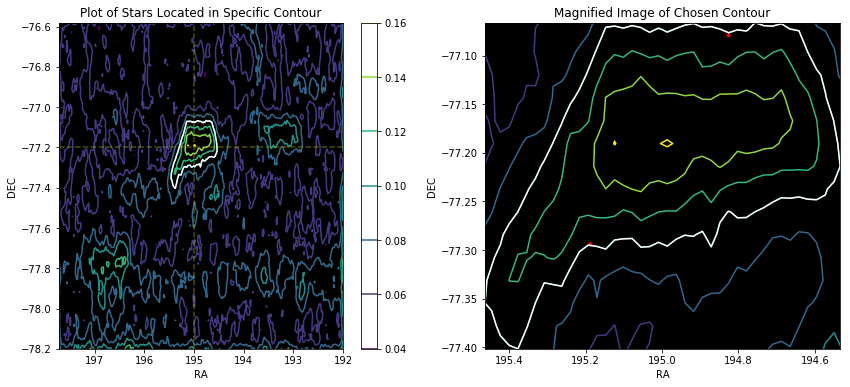

Total Stars within contour:  2 

Star Magnitudes have also been found in G,J,H,K


Star ID                  RA                  DEC

5.78893682914e+18      194.828295      -77.078339
5.78888298743e+18      195.188265      -77.293633
Gmag <=  17.0 
Total Stars:  5617


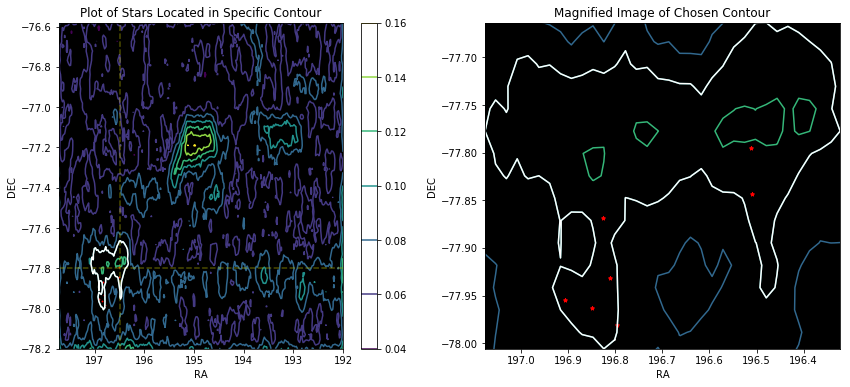

Total Stars within contour:  7 

Star Magnitudes have also been found in G,J,H,K


Star ID                  RA                  DEC

5.78813019992e+18      196.797196      -77.981453
5.78813026864e+18      196.848917      -77.96328
5.78813023428e+18      196.905883      -77.954834
5.78813332666e+18      196.811709      -77.931725
5.78813452925e+18      196.82539      -77.868614
5.78818153337e+18      196.509574      -77.843819
5.78818259852e+18      196.512561      -77.795258
Gmag <=  17.0 
Total Stars:  5617


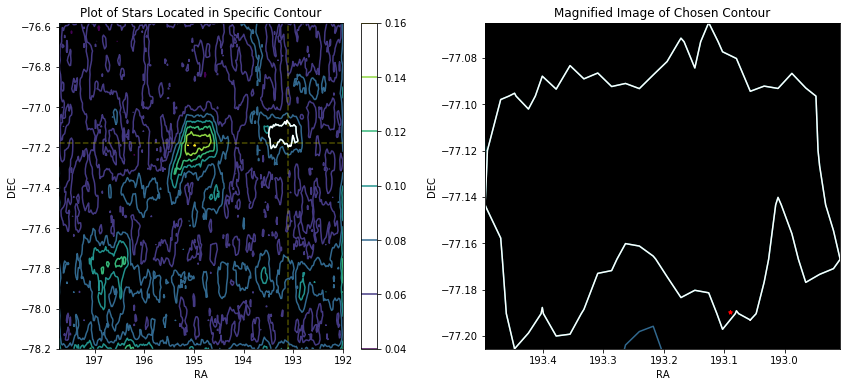

Total Stars within contour:  1 

Star Magnitudes have also been found in G,J,H,K


Star ID                  RA                  DEC

5.78894315133e+18      193.090173      -77.189835


In [48]:
stars1 = StarSelection(RA,DEC,Source,distances[0],3,Gmag,Jmag,Hmag,Kmag,Gvalue=17.0,specRA=195,specDEC=-77.2)
stars2 = StarSelection(RA,DEC,Source,distances[0],3,Gmag,Jmag,Hmag,Kmag,Gvalue=17.0,specRA=196.5,specDEC=-77.8)
stars3 = StarSelection(RA,DEC,Source,distances[0],3,Gmag,Jmag,Hmag,Kmag,Gvalue=17.0,specRA=193.1,specDEC=-77.18)

/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: UserWarning: Warning: converting a masked element to nan.
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:179: RuntimeWarning: invalid value encountered in greater


Gmag <=  17.0 
Total Stars:  5617


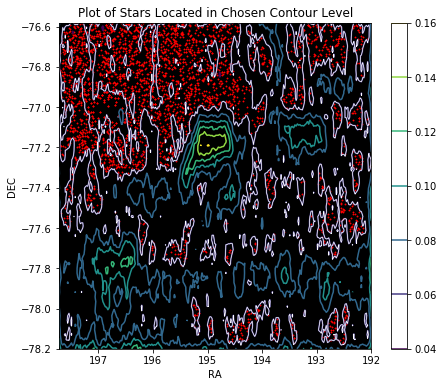

Total Stars within contour:  3260 

Star Magnitudes have also been found in G,J,H,K


Star ID                  RA                  DEC

5.78921926619e+18      192.330014      -76.59742
5.78919586721e+18      192.261561      -76.596779
5.78921926619e+18      192.320813      -76.594917
5.78919586721e+18      192.288141      -76.592026
5.78918370386e+18      192.307863      -76.650848
5.78919538617e+18      192.163368      -76.649422
5.78919548925e+18      192.190927      -76.646713
5.78919555797e+18      192.225917      -76.625488
5.78919559233e+18      192.252532      -76.617126
5.78919579849e+18      192.241631      -76.615875
5.78921906003e+18      192.341168      -76.608276
5.78919583285e+18      192.208865      -76.607162
5.78919583285e+18      192.216539      -76.602684
5.78919583285e+18      192.212577      -76.601067
5.78918329154e+18      192.173608      -76.70591
5.78918336026e+18      192.182936      -76.685204
5.78918363514e+18      192.171774      -76.669083
5.78918363514e+1

5.78905640103e+18      196.255011      -76.688225
5.78905152195e+18      195.964642      -76.676918
5.78905657283e+18      196.203851      -76.672783
5.78905152195e+18      195.964581      -76.672066
5.7890517281e+18      195.938529      -76.661377
5.78905021628e+18      195.909125      -76.755173
5.78905025064e+18      195.986824      -76.744385
5.78905025064e+18      195.996189      -76.742638
5.78905031936e+18      195.967307      -76.734177
5.78905052551e+18      195.978922      -76.721718
5.78905052551e+18      195.970702      -76.719856
5.78905059423e+18      195.922073      -76.716553
5.78904691774e+18      195.971115      -76.797279
5.78904699076e+18      195.96805      -76.791809
5.78904722698e+18      195.991683      -76.767265
5.7890472957e+18      195.975186      -76.76358
5.78903368924e+18      195.951063      -76.87249
5.78903368924e+18      195.977952      -76.868065
5.78904550899e+18      195.953012      -76.842232
5.78905801594e+18      196.438777      -76.591537
5.789

5.78896902421e+18      197.300618      -77.188446
5.78897775159e+18      195.907447      -77.187759
5.78897575872e+18      196.491366      -77.187447
5.78897627412e+18      196.1205      -77.187454
5.78896974577e+18      196.747321      -77.187271
5.78896902421e+18      197.29927      -77.187004
5.78896912729e+18      197.111041      -77.186836
5.78897837006e+18      195.676254      -77.186485
5.78896740931e+18      197.548494      -77.186378
5.78897627412e+18      196.151707      -77.18573
5.78897579308e+18      196.425313      -77.185425
5.78896898986e+18      197.27397      -77.185013
5.78896881806e+18      197.035594      -77.184166
5.78896606928e+18      197.347004      -77.183487
5.78896967705e+18      196.7835      -77.183426
5.78897575872e+18      196.524823      -77.183151
5.78897565564e+18      196.61928      -77.18264
5.78896740931e+18      197.560143      -77.181419
5.78896919601e+18      197.081887      -77.180832
5.78896960833e+18      196.91592      -77.17942
5.788978026

5.78897043296e+18      197.125154      -77.113152
5.78897166991e+18      197.304391      -77.112442
5.78898197784e+18      196.802074      -77.112419
5.7889703986e+18      197.216921      -77.11174
5.78898266503e+18      196.636343      -77.110947
5.78897922906e+18      195.882987      -77.110771
5.78902606138e+18      195.796959      -77.110336
5.78902606138e+18      195.807471      -77.110199
5.78898273375e+18      196.797159      -77.1091
5.78897187607e+18      197.266915      -77.107841
5.78898214964e+18      197.064633      -77.104828
5.78897173863e+18      197.460908      -77.102821
5.7890263019e+18      195.678281      -77.102753
5.78897101708e+18      197.494597      -77.101883
5.78897173863e+18      197.453333      -77.101952
5.78902671422e+18      195.523868      -77.101761
5.7890263019e+18      195.709933      -77.101494
5.78898012241e+18      196.298736      -77.101242
5.78898287119e+18      196.642412      -77.101013
5.78898269939e+18      196.754361      -77.099876
5.7889

5.78903341437e+18      195.998285      -76.897301
5.78914068976e+18      194.291327      -76.897217
5.78903303641e+18      196.218028      -76.897041
5.78895435261e+18      194.533148      -76.89682
5.78903348308e+18      195.879166      -76.896629
5.7890335518e+18      195.838599      -76.896523
5.78903867141e+18      196.387566      -76.895836
5.7890337236e+18      196.078093      -76.895851
5.7890335518e+18      195.803746      -76.895309
5.78903506363e+18      196.943313      -76.894966
5.78903506363e+18      196.933622      -76.894905
5.78903286461e+18      196.329744      -76.894424
5.78914147574e+18      194.214577      -76.893944
5.78914061675e+18      194.456598      -76.893295
5.78895462748e+18      194.777094      -76.893234
5.78898905594e+18      197.46846      -76.893173
5.78898902158e+18      197.419512      -76.893097
5.78914078855e+18      194.343868      -76.893074
5.78903523543e+18      196.878432      -76.893005
5.7890337236e+18      196.062971      -76.89267
5.78914

5.78902867272e+18      196.411378      -76.970093
5.78898524201e+18      197.348044      -76.96981
5.78903145586e+18      195.403162      -76.969513
5.78898548253e+18      197.573562      -76.96946
5.78898812823e+18      197.222819      -76.969269
5.78895174127e+18      194.433126      -76.969208
5.7889523941e+18      194.359548      -76.967941
5.78895301258e+18      194.658831      -76.967201
5.78898544817e+18      197.498313      -76.967171
5.78902942864e+18      196.25069      -76.967133
5.78903454824e+18      196.44891      -76.966698
5.78895005764e+18      194.8391      -76.965897
5.78895029816e+18      195.03551      -76.965401
5.78904310811e+18      195.330723      -76.965347
5.78902960043e+18      196.160633      -76.964256
5.78904334433e+18      195.175953      -76.963753
5.78898764719e+18      196.902777      -76.963257
5.7889502638e+18      194.955571      -76.962463
5.78904334433e+18      195.223707      -76.961914
5.78898781899e+18      196.828533      -76.961548
5.7889854

5.78916064847e+18      194.673763      -76.60112
5.78924290569e+18      195.1041      -76.601105
5.78905780978e+18      196.27456      -76.600922
5.78924324929e+18      195.443507      -76.600876
5.78924544831e+18      196.065048      -76.600304
5.78916154183e+18      194.459443      -76.600235
5.78924036307e+18      195.585533      -76.600044
5.78905860005e+18      196.773587      -76.599785
5.78924324929e+18      195.42667      -76.599693
5.7890785287e+18      197.244449      -76.599289
5.78924039743e+18      195.643714      -76.598984
5.78924328365e+18      195.469078      -76.598541
5.78924273389e+18      195.194126      -76.598526
5.78907839126e+18      197.394335      -76.598343
5.7890416607e+18      197.354556      -76.705887
5.78906213911e+18      197.472865      -76.705688
5.78905337737e+18      196.312349      -76.705505
5.78905354917e+18      196.52988      -76.705292
5.78905289634e+18      196.605807      -76.705055
5.78905351481e+18      196.492421      -76.705185
5.789050

5.78903798421e+18      197.081617      -76.792809
5.78923665222e+18      194.986993      -76.79261
5.78904973524e+18      195.660686      -76.792618
5.78914305629e+18      194.869984      -76.792526
5.78904904805e+18      195.187985      -76.791786
5.78904699076e+18      195.96805      -76.791809
5.7890469521e+18      196.035399      -76.791756
5.78904090479e+18      196.956306      -76.791138
5.78904629927e+18      196.067585      -76.790504
5.78906073036e+18      197.527214      -76.790451
5.7890381603e+18      197.285165      -76.790154
5.78903966784e+18      196.827767      -76.790054
5.78905193427e+18      196.25222      -76.789963
5.78903819037e+18      197.226234      -76.78997
5.78904626491e+18      196.187582      -76.789612
5.78914374348e+18      194.689221      -76.789429
5.78904025195e+18      196.434092      -76.789116
5.78905193426e+18      196.257311      -76.789108
5.78904021759e+18      196.471868      -76.78894
5.78914305629e+18      194.869852      -76.788651
5.78904

5.78806989858e+18      193.777716      -78.074142
5.78807079193e+18      193.729864      -78.050697
5.78807852288e+18      194.942434      -78.114098
5.78807859159e+18      194.943308      -78.103523
5.78807855723e+18      194.980164      -78.101807
5.78807859159e+18      194.944838      -78.09684
5.78807862595e+18      194.966413      -78.094017
5.78807862595e+18      194.991987      -78.085037
5.78807938187e+18      194.982369      -78.080322
5.78807945059e+18      194.963082      -78.071411
5.78807965675e+18      194.940467      -78.061615
5.78807965675e+18      194.945008      -78.057899
5.78807965675e+18      194.92177      -78.055939
5.78803148439e+18      195.181159      -78.11898
5.78808429531e+18      195.226846      -78.094986
5.78807848852e+18      195.163503      -78.085876
5.78808429531e+18      195.252912      -78.084213
5.78808463891e+18      195.193152      -78.058044
5.78808546354e+18      195.185089      -78.033409
5.78808539482e+18      195.223589      -78.033302
5.7

In [84]:
stars = StarSelection(RA,DEC,Source,distances[0],1,Gmag,Jmag,Hmag,Kmag,Gvalue=17.0)

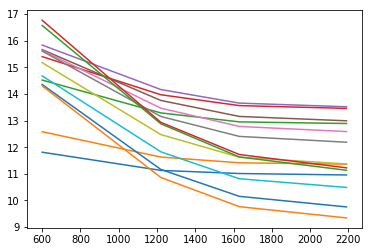

In [85]:
#   [RA[i],DEC[i],Source[i],Gmag[i],Jmag[i],Hmag[i],Kmag[i]]
EffWave = [600,1220,1630,2190]
GK = stars[:,3] - stars[:,6]
# colorGroups = [-0.3,-0.02692307692307694,0.2461538461538461,0.5192307692307692,0.7923076923076922,
#         1.0653846153846152,1.3384615384615381,1.6115384615384611,1.8846153846153841,
#         2.157692307692307,2.43076923076923,2.703846153846153,2.976923076923076]

colorGroups = np.linspace(np.nanmin(GK),np.nanmax(GK),14)
#print(colorGroups)
stepSize = (colorGroups[2]-colorGroups[1])

allGband = []
allJband = []
allHband = []
allKband = []

for c in colorGroups:
    Gband = []
    Jband = []
    Hband = []
    Kband = []
    for s in range(len(stars[:,0])):
        GKval = stars[s,3] - stars[s,6]
       
        if(c <= GKval <= c+stepSize):
            Gband.append(stars[s,3])
            #print('Gband:',Gband)
            Jband.append(stars[s,4])
            Hband.append(stars[s,5])
            Kband.append(stars[s,6])
    meanG = np.nanmean(Gband)
    meanJ = np.nanmean(Jband)
    meanH = np.nanmean(Hband)
    meanK = np.nanmean(Kband)
    allGband.append(meanG)
    allJband.append(meanJ)
    allHband.append(meanH)
    allKband.append(meanK)

GKcolors = [allGband,allJband,allHband,allKband]

plt.plot(EffWave,GKcolors)
plt.show()

In [76]:
stars[2,4]

13.531999588012695

AttributeError: 'numpy.float64' object has no attribute 'mask'